# Week 2 - 基本視覺任務實作

1. 下載資料集
2. 探索資料
3. 視覺化資料**
4. 準備資料
5. 建立模型
6. 訓練模型
7. 繪製訓練log
8. 儲存以及載入模型
9. 測試模型

## **1. 下載資料集**
從Keras下載CIFAR10資料集

更多有關資料集的資訊：https://keras.io/datasets/



In [5]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test)  = cifar10.load_data() # 回傳兩個tuple

CLASS_NAME = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

### 檢查是否使用GPU

In [6]:
# Check to see if we're using the GPU
from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15612207405131179387
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1723124942
locality {
  bus_id: 1
  links {
  }
}
incarnation: 7006767301796566185
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3050 Ti Laptop GPU, pci bus id: 0000:f3:00.0, compute capability: 8.6"
xla_global_id: 416903419
]


## **2. 探索資料**

In [7]:
# 顯示資料集的形狀
print("Initial shape or dimensions of x_train", str(x_train.shape))
print("Initial shape or dimensions of x_test", str(x_test.shape))
print("Initial shape or dimensions of y_train", str(y_train.shape))
print("Initial shape or dimensions of y_test", str(y_test.shape))
print('\n')

# 顯示每組資料的sample數
print ("Number of samples in our training data: " + str(len(x_train)))
print ("Number of labels in our training data: " + str(len(y_train)))
print ("Number of samples in our test data: " + str(len(x_test)))
print ("Number of labels in our test data: " + str(len(y_test)))

Initial shape or dimensions of x_train (50000, 32, 32, 3)
Initial shape or dimensions of x_test (10000, 32, 32, 3)
Initial shape or dimensions of y_train (50000, 1)
Initial shape or dimensions of y_test (10000, 1)


Number of samples in our training data: 50000
Number of labels in our training data: 50000
Number of samples in our test data: 10000
Number of labels in our test data: 10000


## **3. 視覺化資料**

使用Matplotlib來顯示圖片

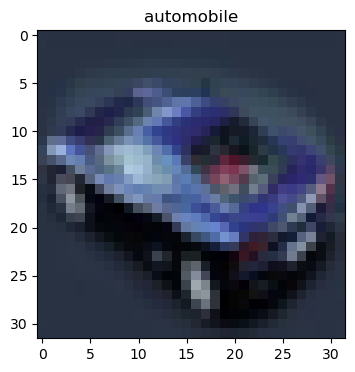

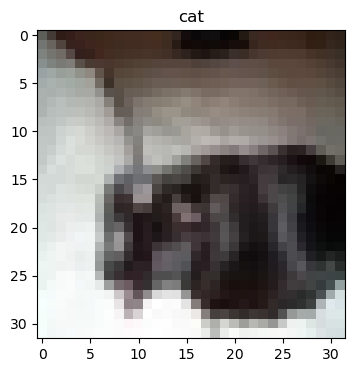

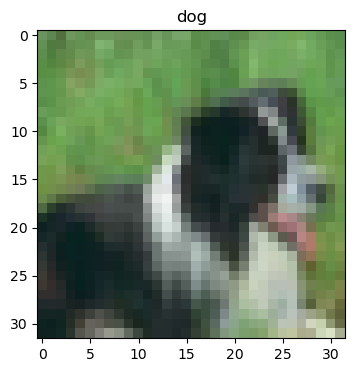

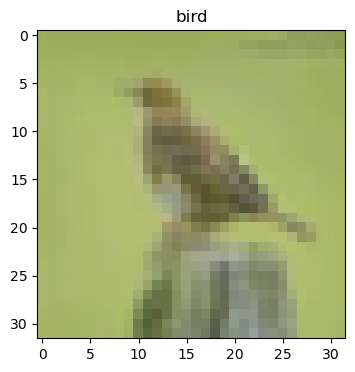

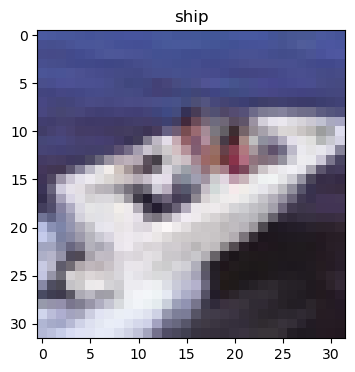

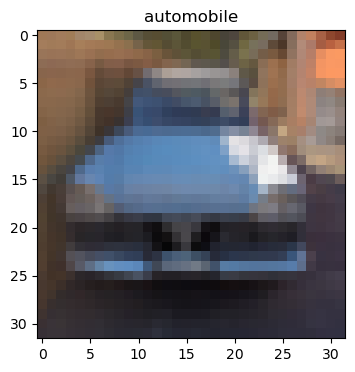

In [8]:
import numpy as np
from matplotlib import pyplot as plt

def imshow(title, image = None, size = 6):
    if image.any():
      w, h = image.shape[0], image.shape[1]
      aspect_ratio = w/h
      plt.figure(figsize=(size * aspect_ratio,size))
      plt.imshow(image)
      plt.title(title)
      plt.show()
    else:
      print("Image not found")


# 隨機顯示六張圖片
for i in range(0,6):
    random_num = np.random.randint(0, len(x_train))
    img = x_train[random_num]
    imshow(CLASS_NAME[y_train[random_num][0]], img, size = 4)

## **4. 準備資料**

前處理
1. 將資料轉換為Kears可接受的形狀 (四維向量: samples, rows, columns, channels)
2. 將資料類別從 uint8 轉成 float32
3. 將資料轉換為 0 到 1之間的值
4. One hot encoding

In [9]:
# Store the number of rows and columns
img_rows = x_train[0].shape[0]
img_cols = x_train[0].shape[1]
img_channels = x_train[0].shape[2]

# 將資料轉換為Kears可接受的形狀
#x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
#x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

# Store the shape of a single image
input_shape = (img_rows, img_cols, img_channels)

# 將資料類別轉成 float32
x_train = x_train.astype('float32') #本來是uint8
x_test = x_test.astype('float32')

# Normalization: 將每個pixel的值從 (0~255) 轉成 (0~1)
x_train /= 255.0
x_test /= 255.0

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


#### **One Hot Encoding**

#### **Example of One Hot Encoding**
![Image of one hot ncoding](https://raw.githubusercontent.com/rajeevratan84/DeepLearningCV/master/hotoneencode.JPG)

In [10]:
from tensorflow.keras.utils import to_categorical

# One hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 檢查轉換後的類別數
print ("Number of Classes: " + str(y_test.shape[1]))

num_classes = y_test.shape[1]
num_pixels = x_train.shape[1] * x_train.shape[2]

Number of Classes: 10


In [11]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

## **5. 建立模型**
建立一個 simple neural network

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.losses import CategoricalCrossentropy

# Linear model
model = Sequential([
              Flatten(input_shape=input_shape),
              Dense(128, activation='relu'),
              Dense(num_classes, activation='softmax')
])
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 128)               393344    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 394,634
Trainable params: 394,634
Non-trainable params: 0
_________________________________________________________________
None


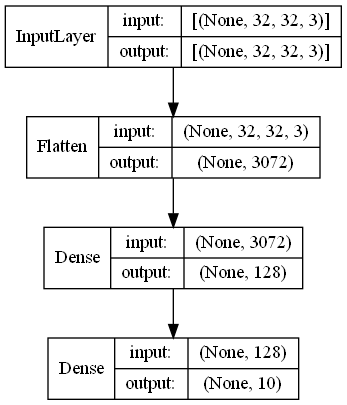

In [14]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=False)

## **6. 訓練模型**
- 使用準備好的資料作為輸入
- 將batch size設為128 (any number ranging from 8 to 256 is good)
- 將epochs設為10 (通常至少10次)

In [23]:
batch_size = 128
epochs = 10

# 儲存訓練過程
history = model.fit(x_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (x_test, y_test))

# 使用 evalute() 來評估模型
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
391/391 [==============================] - 3s 8ms/step - loss: 1.5380 - accuracy: 0.4570 - val_loss: 1.5526 - val_accuracy: 0.4488
Epoch 2/10
391/391 [==============================] - 3s 8ms/step - loss: 1.5273 - accuracy: 0.4579 - val_loss: 1.5756 - val_accuracy: 0.4428
Epoch 3/10
391/391 [==============================] - 3s 8ms/step - loss: 1.5211 - accuracy: 0.4607 - val_loss: 1.5837 - val_accuracy: 0.4333
Epoch 4/10
391/391 [==============================] - 3s 9ms/step - loss: 1.5055 - accuracy: 0.4679 - val_loss: 1.5604 - val_accuracy: 0.4472
Epoch 5/10
391/391 [==============================] - 3s 9ms/step - loss: 1.4988 - accuracy: 0.4715 - val_loss: 1.5682 - val_accuracy: 0.4391
Epoch 6/10
391/391 [==============================] - 3s 9ms/step - loss: 1.4992 - accuracy: 0.4684 - val_loss: 1.5556 - val_accuracy: 0.4443
Epoch 7/10
391/391 [==============================] - 3s 8ms/step - loss: 1.4863 - accuracy: 0.4727 - val_loss: 1.5619 - val_accuracy: 0.4402
Epoch 

## **7. 繪製訓練log**

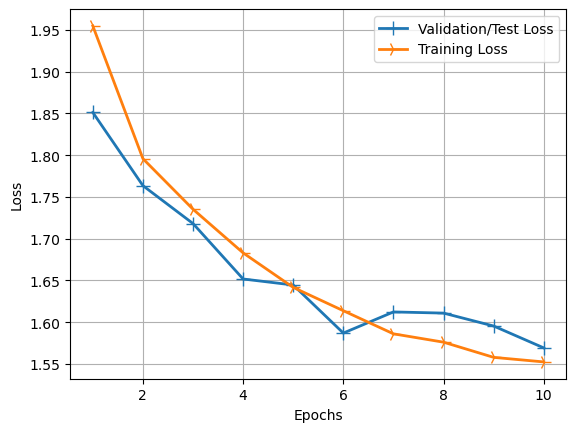

In [16]:
# 獲取訓練記錄
history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

# 準備圖表中的x軸
epochs = range(1, len(loss_values) + 1)

# 製作loss圖表
line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

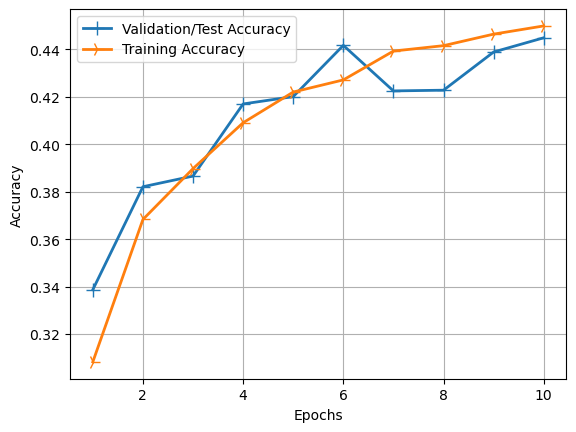

In [17]:
# 製作accuracy圖表
import matplotlib.pyplot as plt

history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

## **8. 儲存以及載入模型**

儲存：

 ```model.save("model_file_name.h5")```

In [18]:
model.save("cifar10_simple_10_Epochs.h5")
print("Model Saved")

Model Saved


載入模型：

```load_model(model_file_name.h5)```

In [19]:
from tensorflow.keras.models import load_model

classifier = load_model('cifar10_simple_10_Epochs.h5')

##  **9. 測試模型**

In [20]:
# 從測試資料組讀取第一個sample
input_im = x_test[0]
print(input_im.shape)

# 將資料轉換為Kears可接受的形狀
input_im = input_im.reshape(1,32,32,3)
print(input_im.shape)

# 預測單一圖片
pred = np.argmax(classifier.predict(input_im), axis=-1)
print(pred)
print(type(pred))
print(len(pred))

(32, 32, 3)
(1, 32, 32, 3)
1/1 [==============================] - 0s 100ms/step
[3]
<class 'numpy.ndarray'>
1


In [21]:
print(x_test.shape)

print("Predicting classes for all 10000 test images...")

pred = np.argmax(classifier.predict(x_test), axis=-1)
print("Completed.\n")

print(pred)
print(type(pred))
print(len(pred))

(10000, 32, 32, 3)
Predicting classes for all 10000 test images...
313/313 [==============================] - 1s 2ms/step
Completed.

[3 8 8 ... 5 6 7]
<class 'numpy.ndarray'>
10000


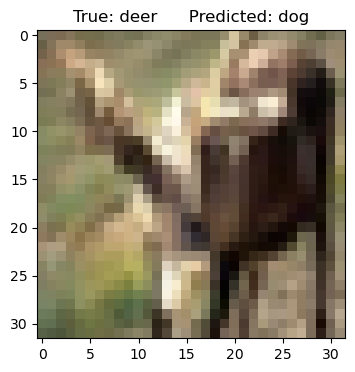

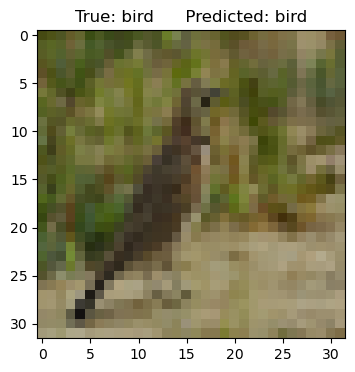

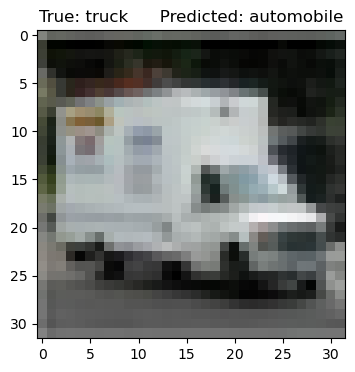

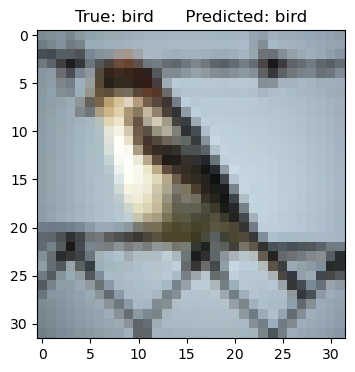

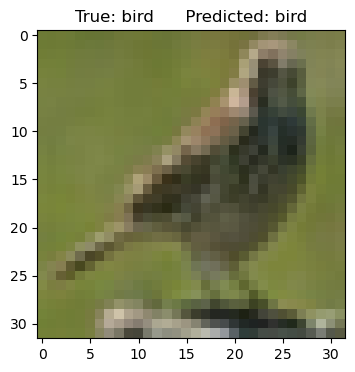

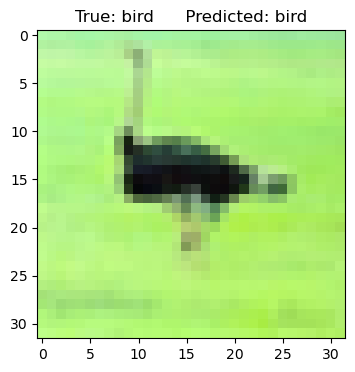

In [22]:
true = np.argmax(y_test, axis=-1)

for i in range(0,6):
    random_num = np.random.randint(0, len(x_test))
    img = x_test[random_num]
    imshow('True: ' + CLASS_NAME[int(true[random_num])] + '      Predicted: ' + CLASS_NAME[int(pred[random_num])], img, size = 4)